# Open Exploration - Dimensional Stacking

### Loading the experiments

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
# import data (samples) 

# import the dike_model_experiments.csv file
df_experiments_no_policy = pd.read_csv('experiments(no policy).csv')

# import the dike_model_outcomes.csv file
df_outcomes_no_policy = pd.read_csv('outcomes(no policy).csv')

## Dimensional stacking

In [ ]:
# import the ema_workbench necessary tools
from ema_workbench.analysis import dimensional_stacking

In [ ]:

uncertainties = ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2']

In [65]:
metrics = df_outcomes_no_policy.columns
print(metrics)

Index(['Gelderland Expected Annual Damage', 'Gelderland Dike Investment Costs',
       'Gelderland Expected Number of Deaths',
       'Overijssel Expected Annual Damage', 'Overijssel Dike Investment Costs',
       'Overijssel Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs'],
      dtype='object')


### 1 - Without policies

In [63]:
# define a function to quickly create dimensional stacking plots

def plot_dimensional_stacking(experiments_df, outcomes_df, uncertainties, target_metric, percentile=10):
    print('Analysis for metric:', target_metric)

    # prepare the data for dimensional stacking
    x = experiments_df[uncertainties]
    data = outcomes_df[target_metric]
    y = data < np.percentile(data, percentile)
    y = y.to_numpy()

    # create the dimensional stacking plot
    dimensional_stacking.create_pivot_plot(x=x, y=y, nr_levels=3, labels=True, categories=True, nbins=3, bin_labels=False)

    return

Analysis for metric: Gelderland Expected Annual Damage


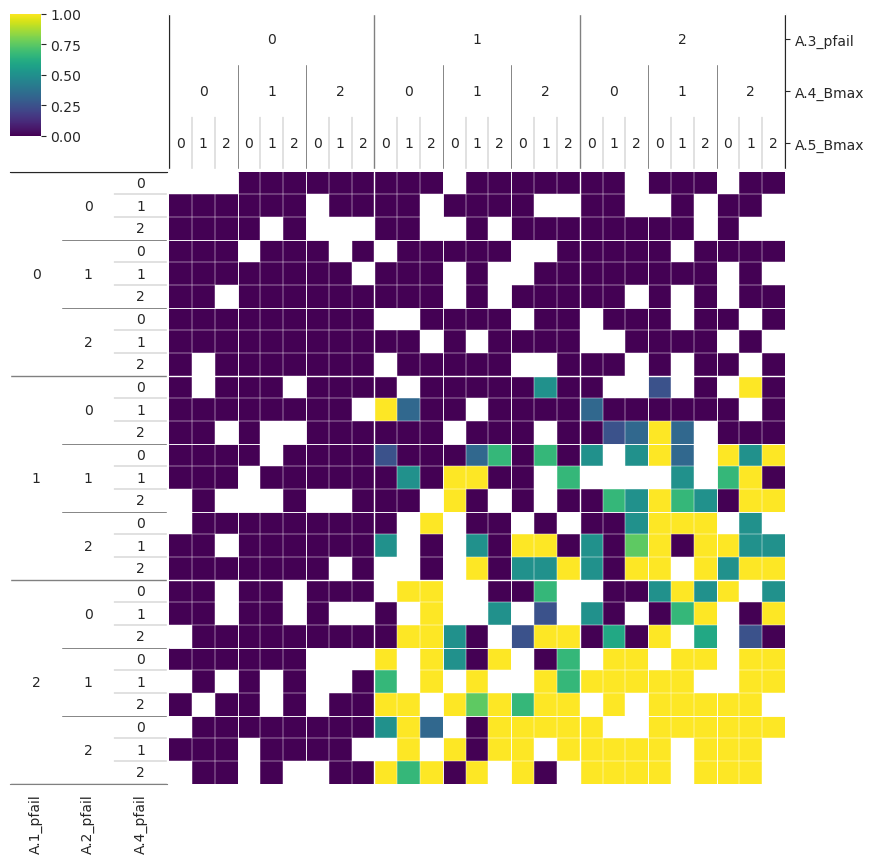

In [64]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[0], percentile=25)

Analysis for metric: Gelderland Dike Investment Costs


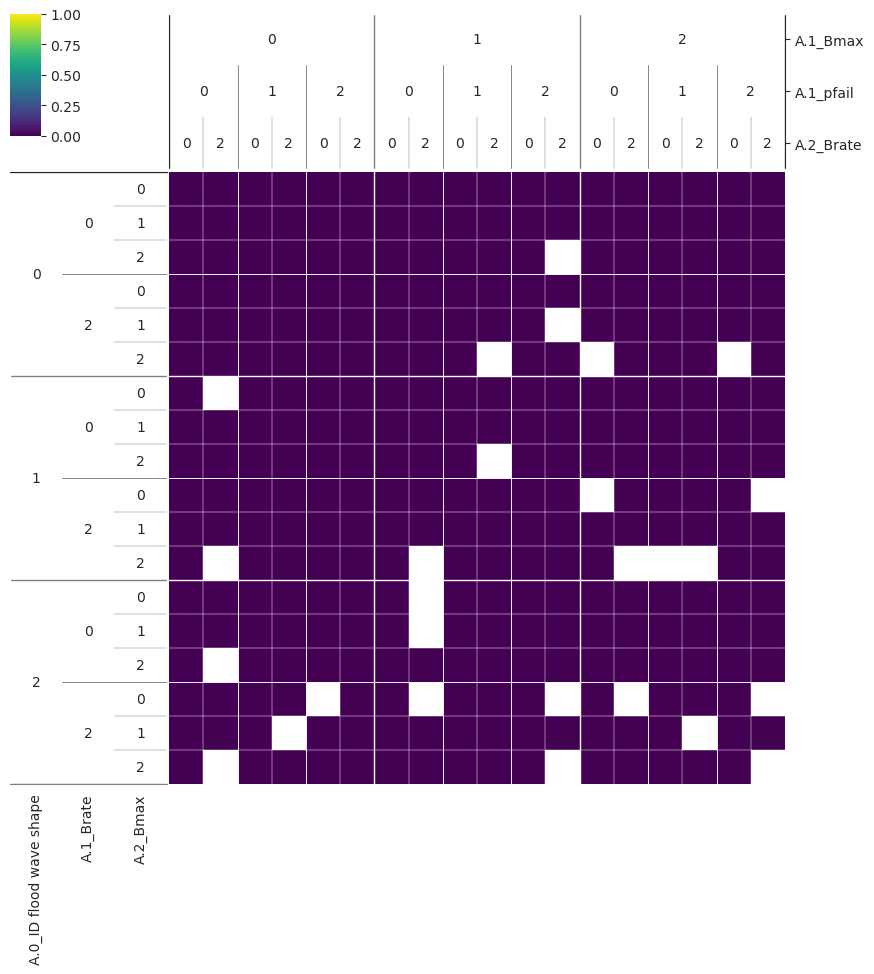

In [67]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[1], percentile=25)

Analysis for metric: Gelderland Expected Number of Deaths


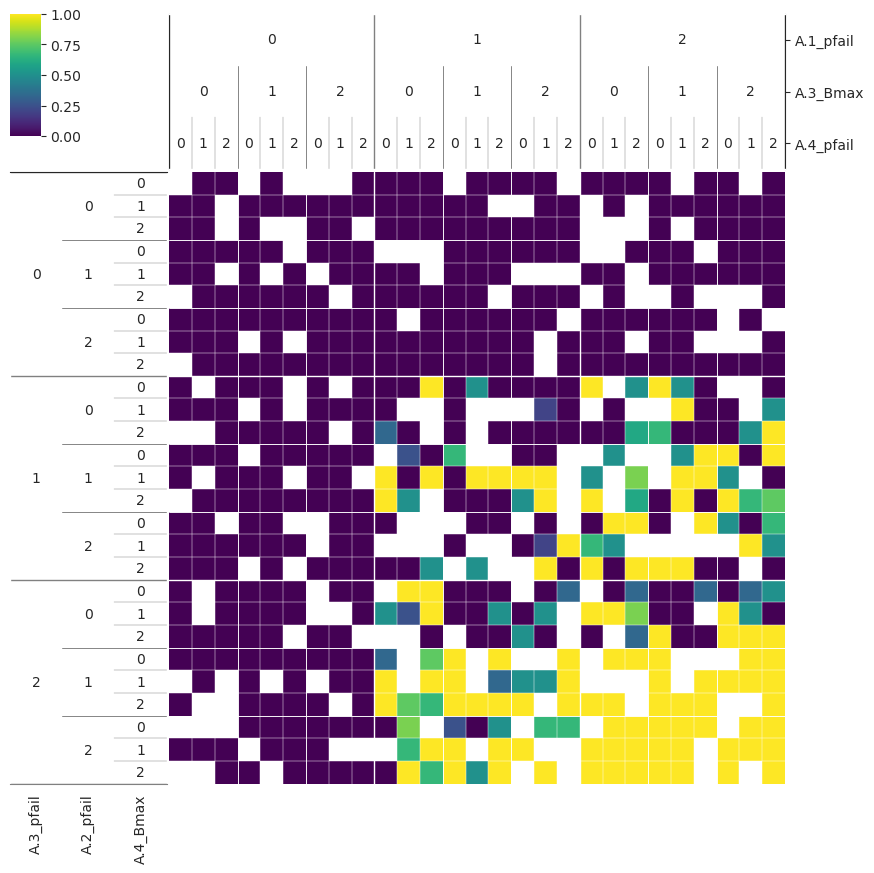

In [68]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[2], percentile=25)

Analysis for metric: Overijssel Expected Annual Damage


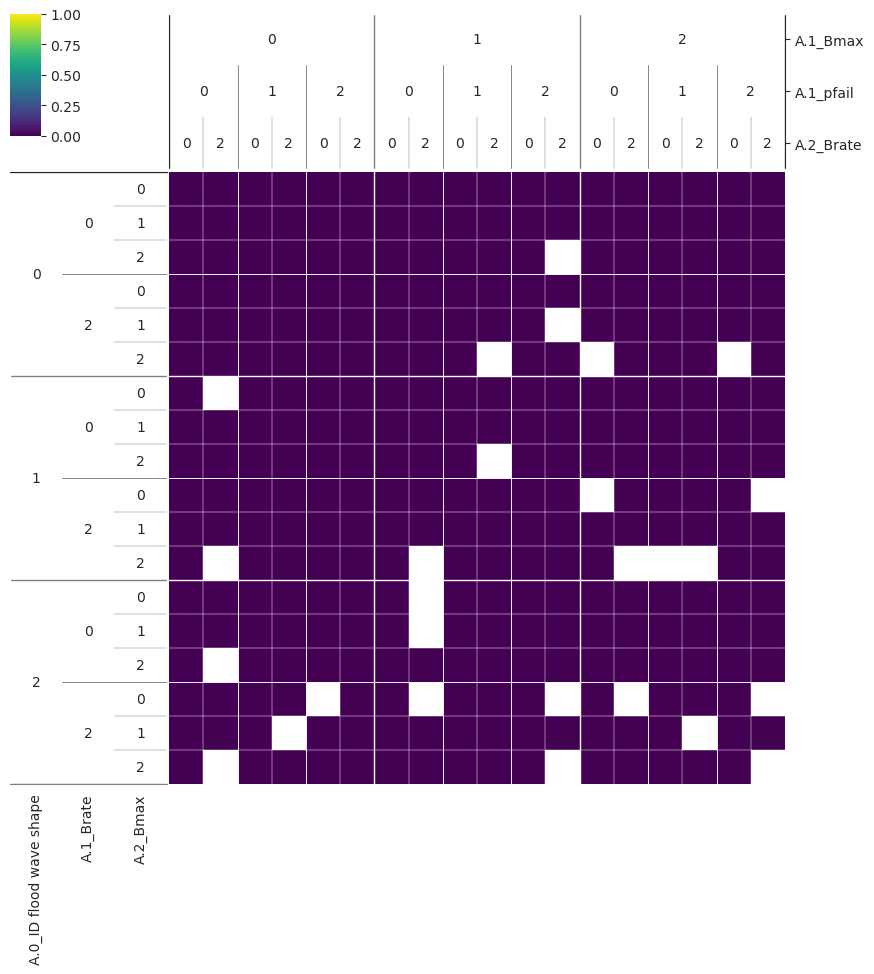

In [69]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[3], percentile=25)

Analysis for metric: Overijssel Dike Investment Costs


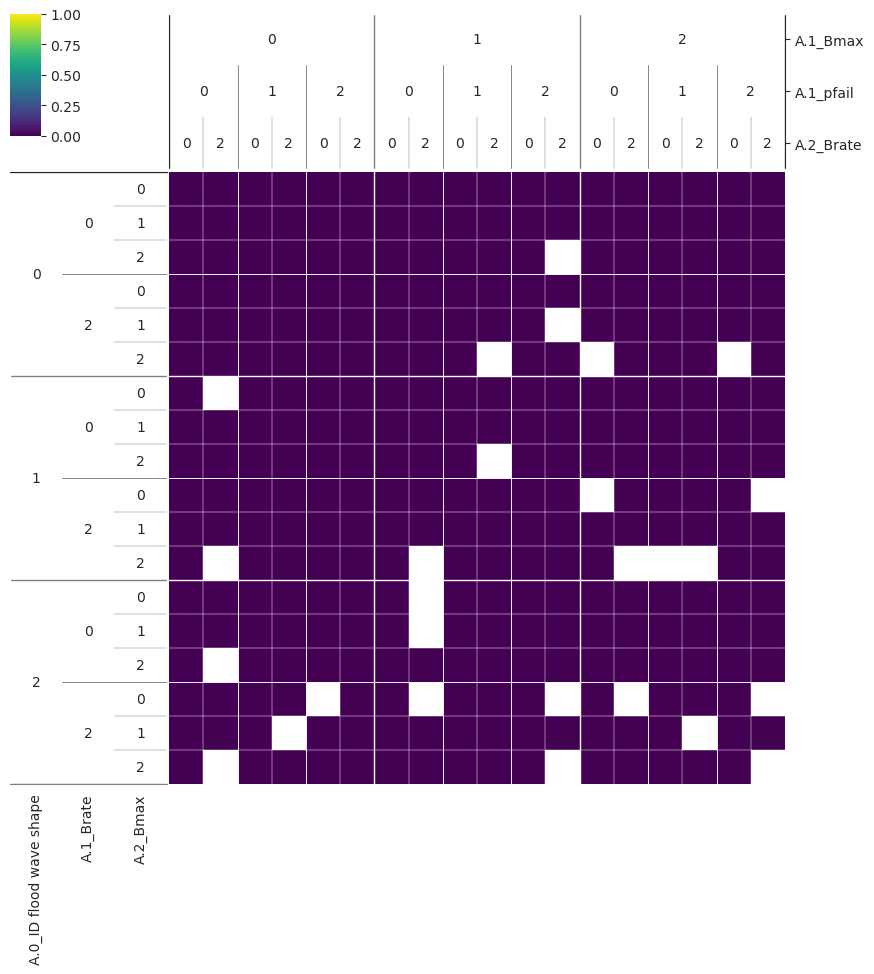

In [70]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[4], percentile=25)

Analysis for metric: Overijssel Expected Number of Deaths


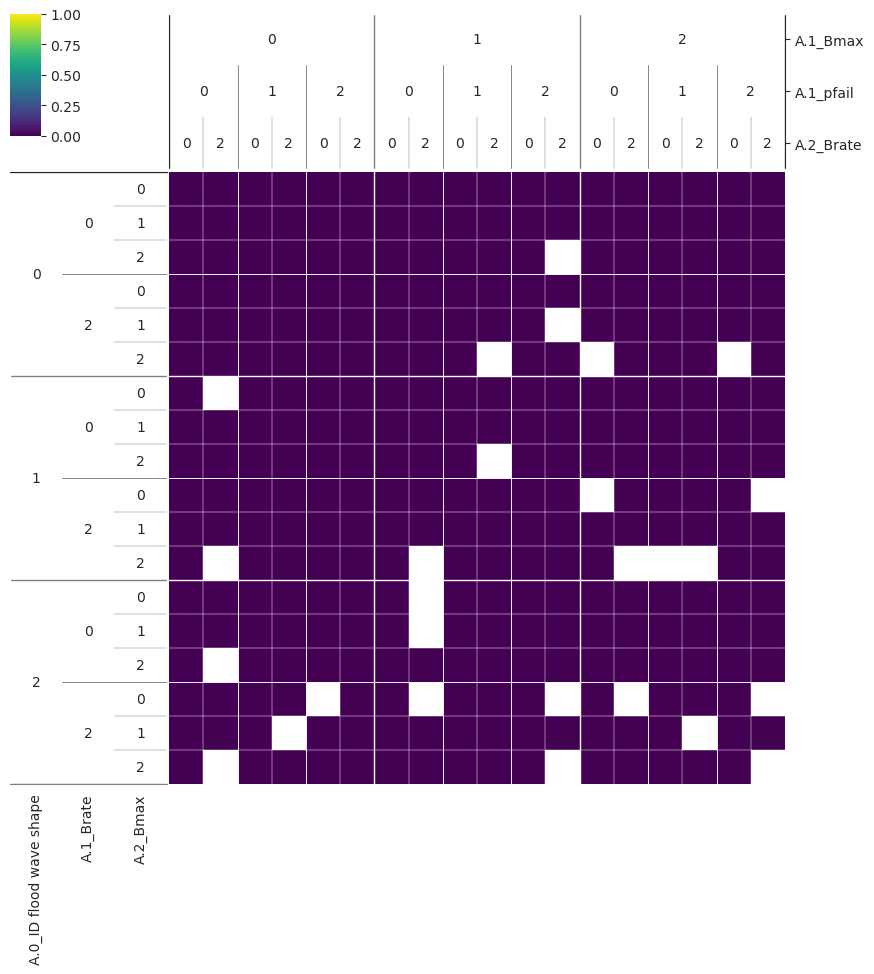

In [71]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[5], percentile=25)

Analysis for metric: RfR Total Costs


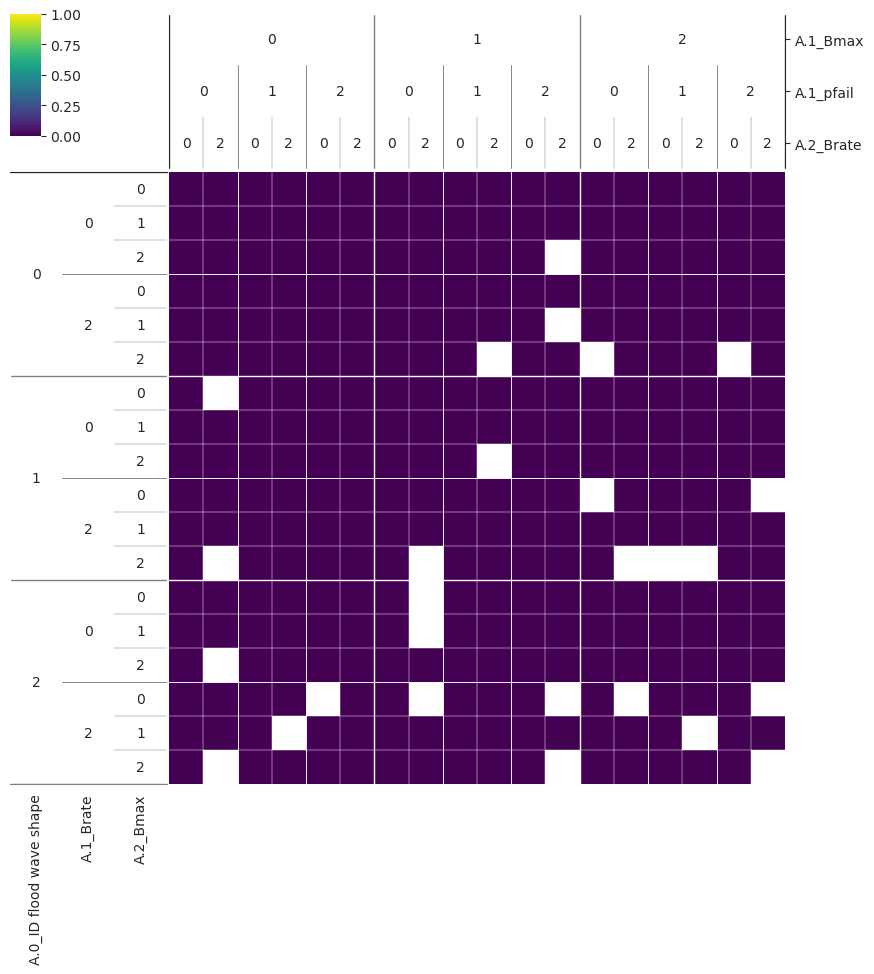

In [72]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[6], percentile=25)

Analysis for metric: Expected Evacuation Costs


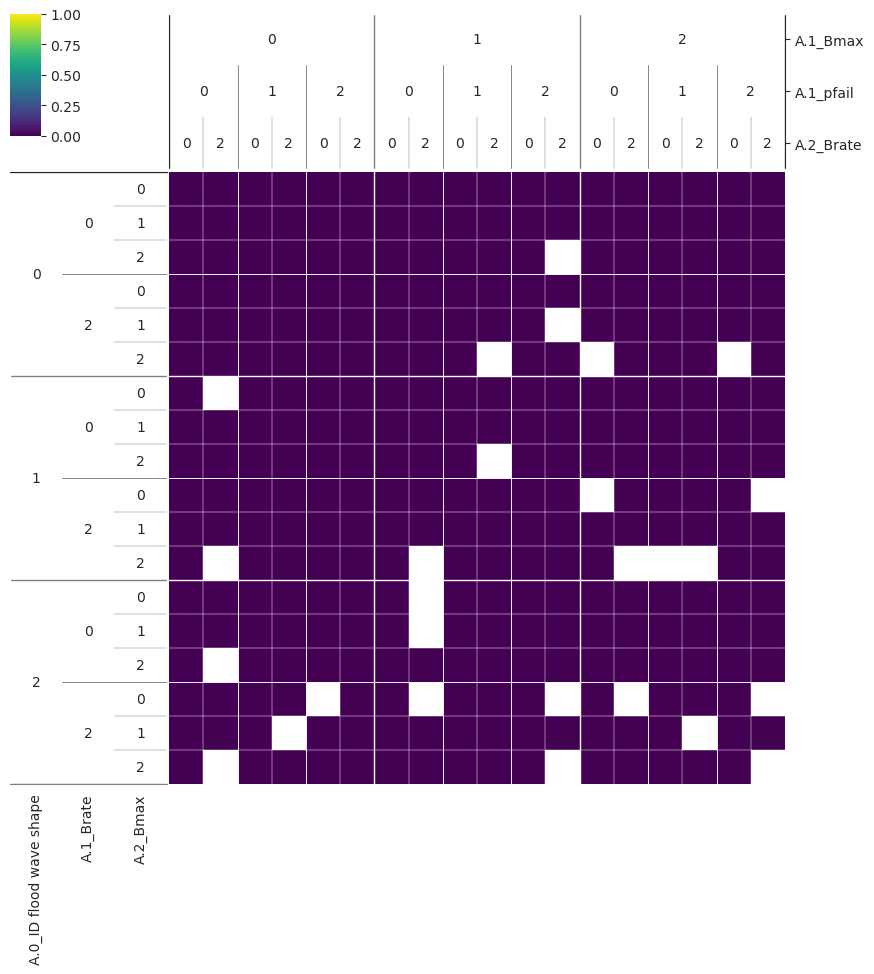

In [73]:
plot_dimensional_stacking(df_experiments_no_policy, df_outcomes_no_policy, uncertainties, metrics[7], percentile=25)

### 

### 2 - With Policies

In [74]:
df_experiments_policy = pd.read_csv('experiments(policy).csv')
df_outcomes_policy = pd.read_csv('outcomes(policy).csv')

Analysis for metric: Gelderland Expected Annual Damage


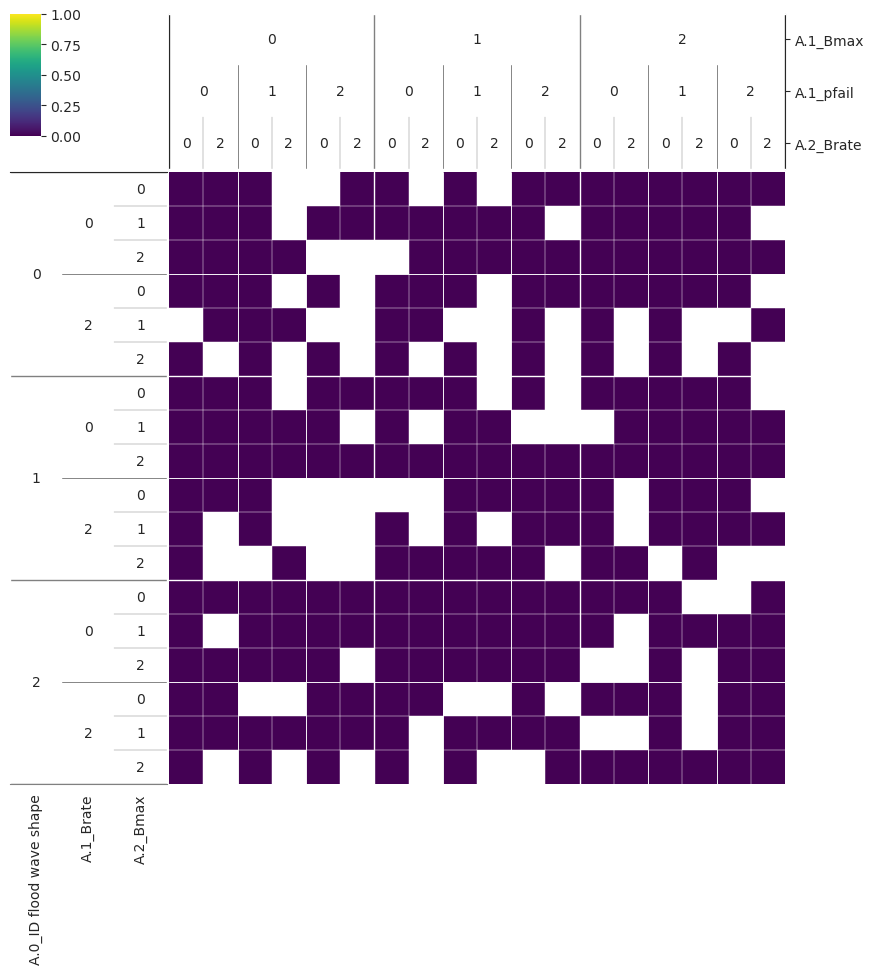

In [75]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[0], percentile=25)

Analysis for metric: Gelderland Dike Investment Costs


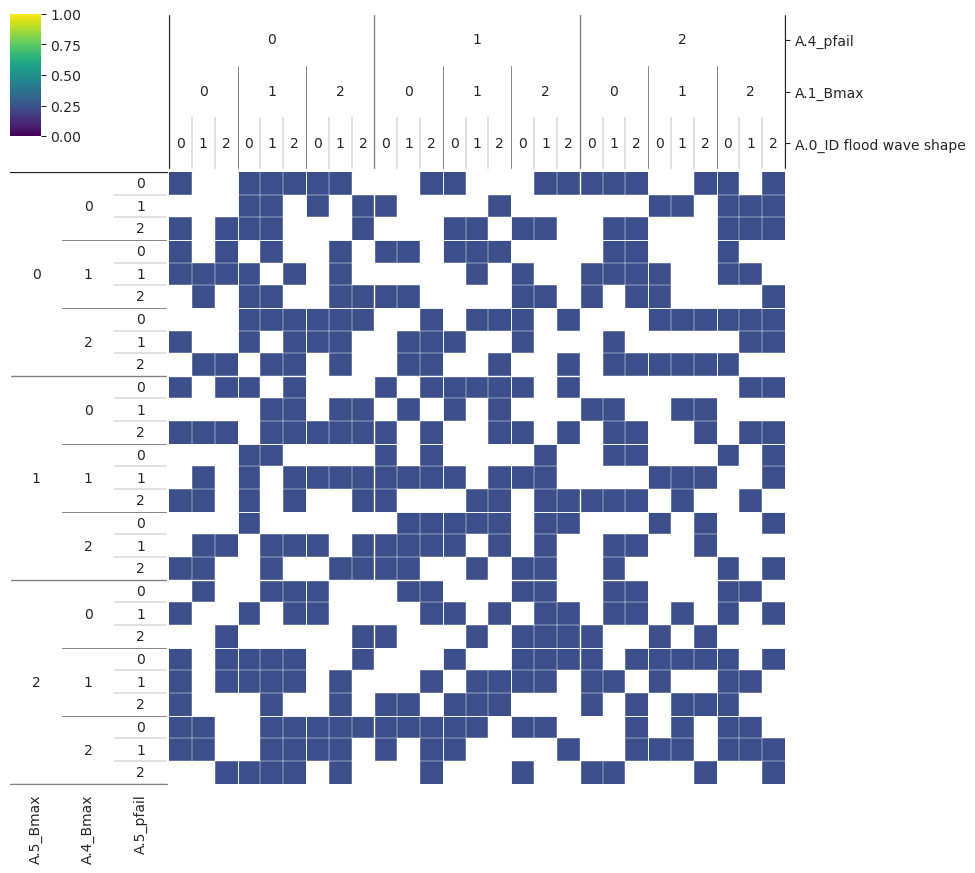

In [77]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[1], percentile=25)

Analysis for metric: Gelderland Expected Number of Deaths


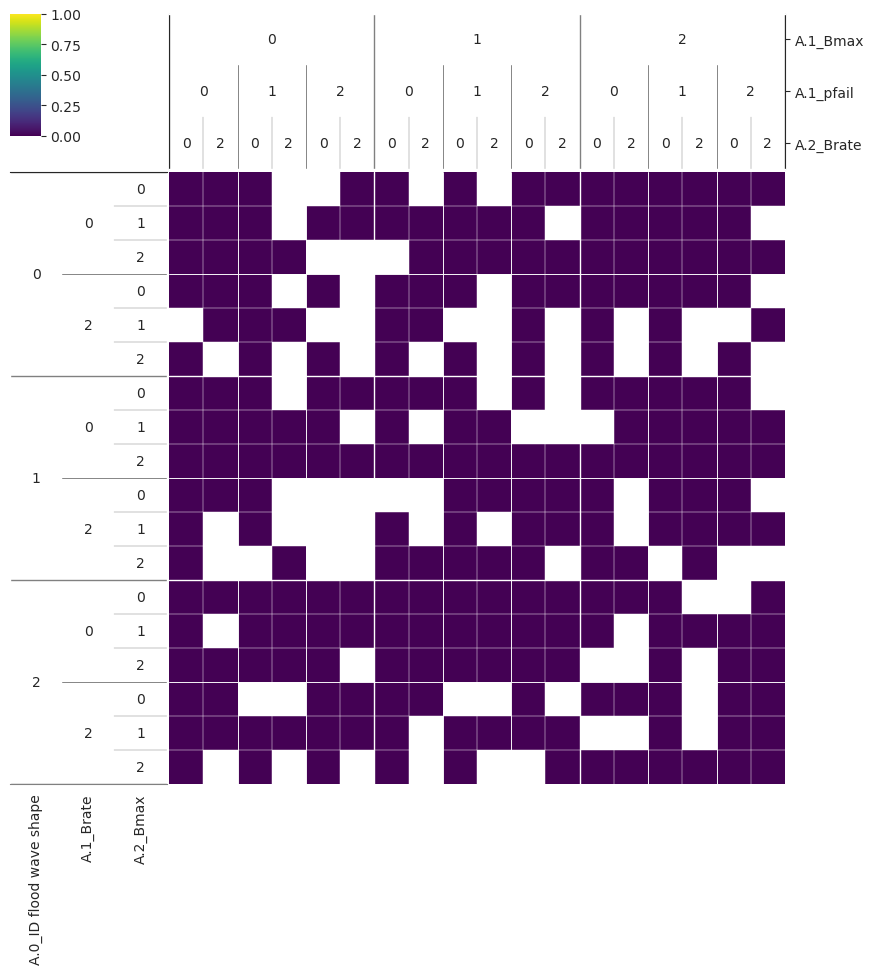

In [78]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[2], percentile=25)

Analysis for metric: Overijssel Expected Annual Damage


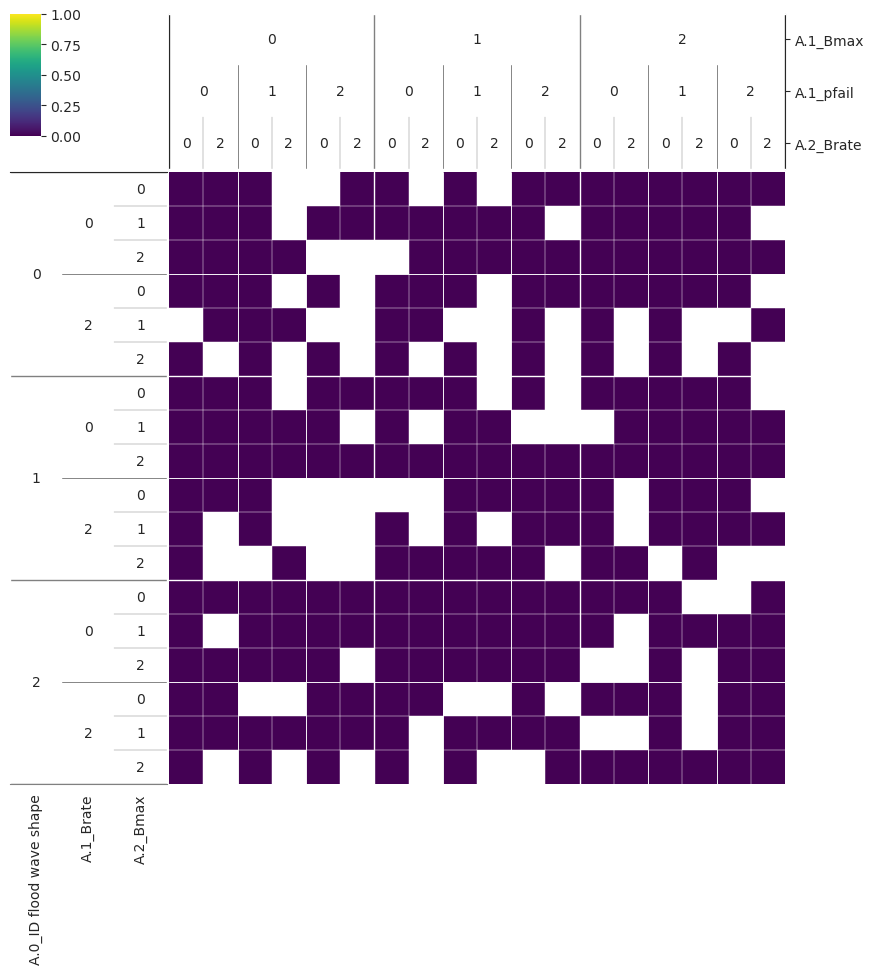

In [79]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[3], percentile=25)

Analysis for metric: Overijssel Dike Investment Costs


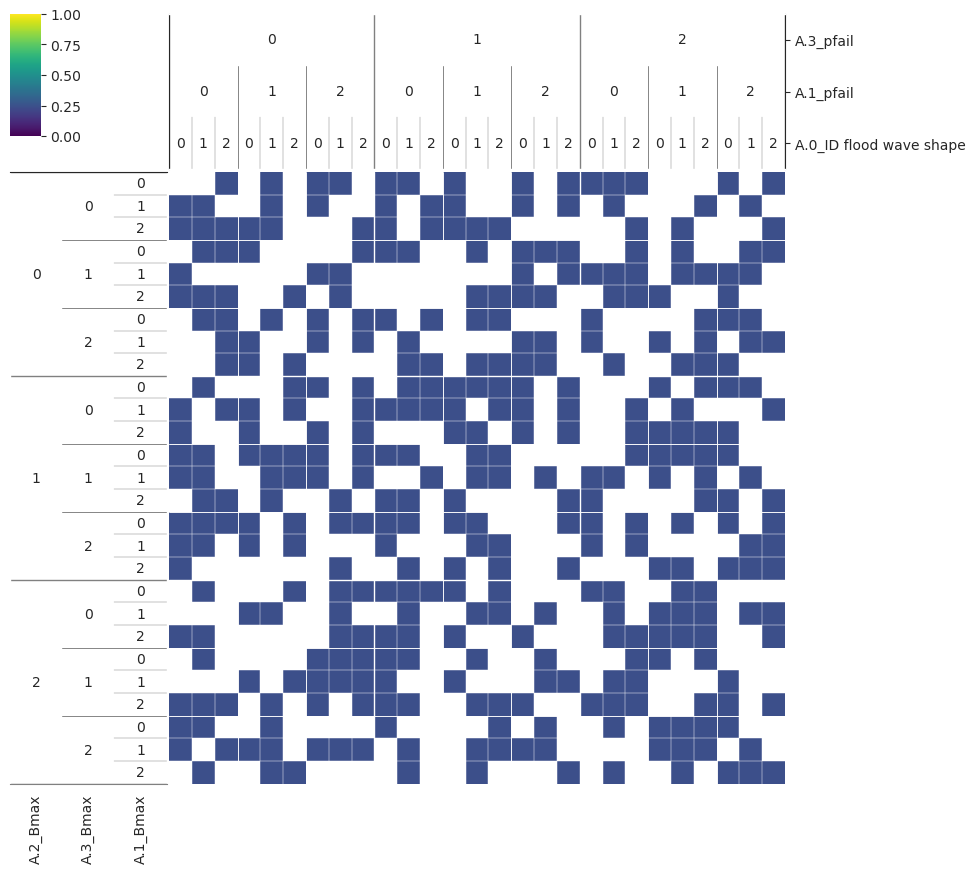

In [80]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[4], percentile=25)

Analysis for metric: Overijssel Expected Number of Deaths


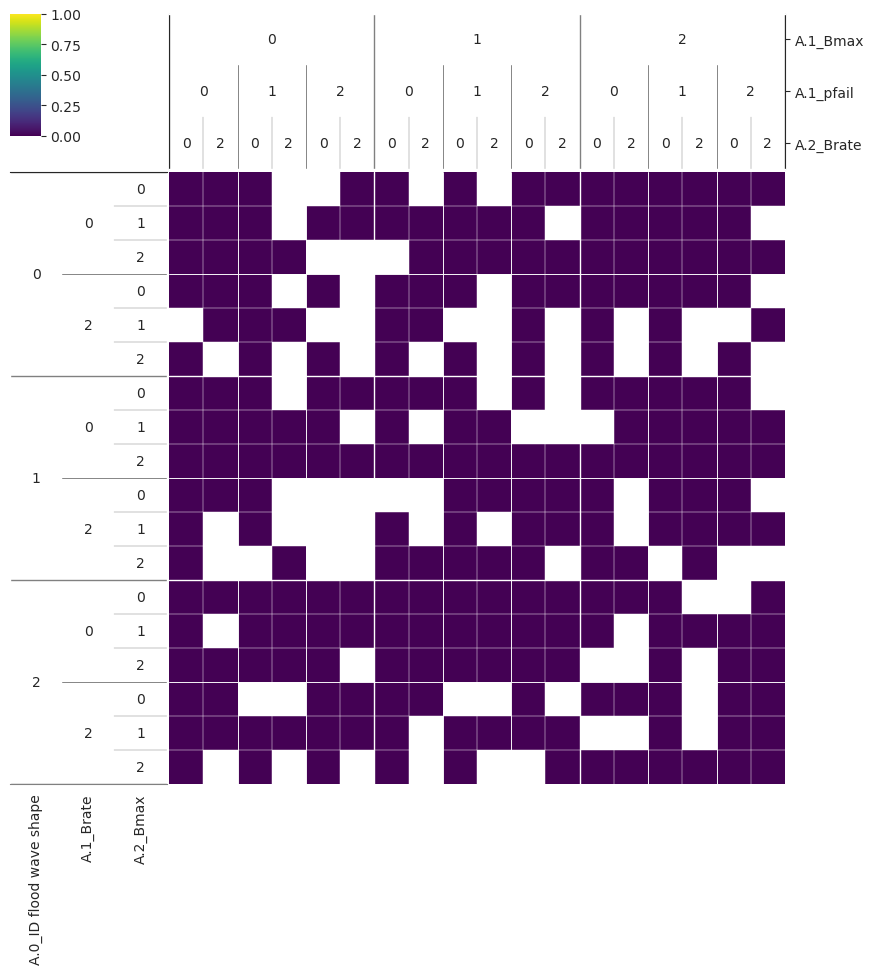

In [81]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[5], percentile=25)

Analysis for metric: RfR Total Costs


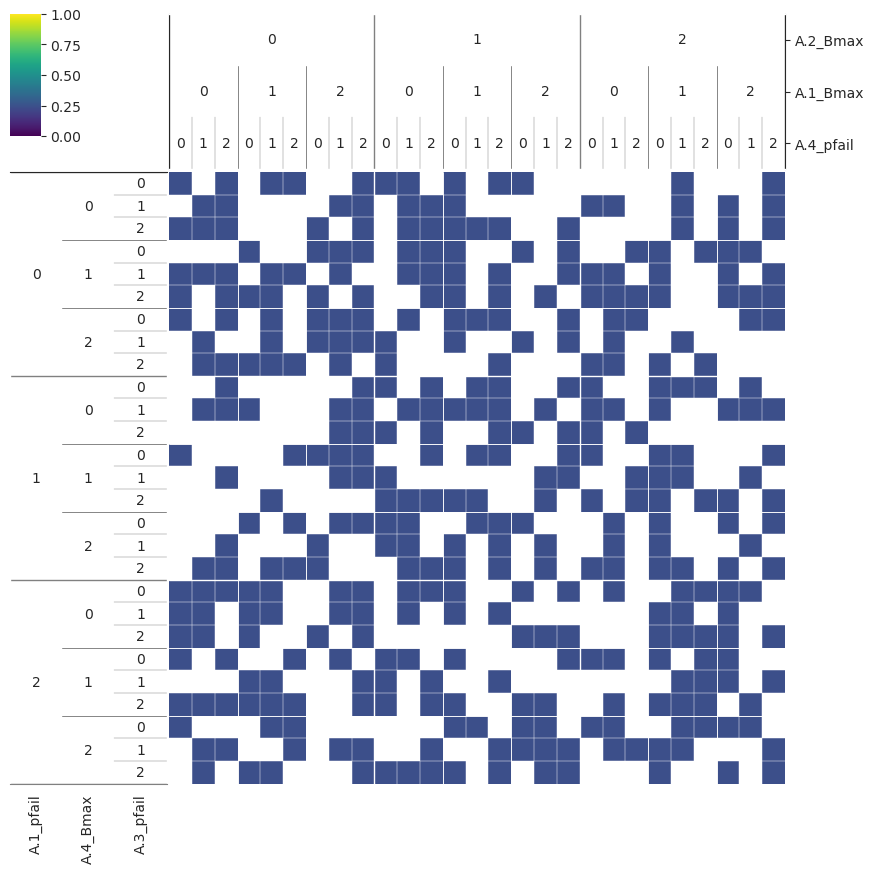

In [82]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[6], percentile=25)

Analysis for metric: Expected Evacuation Costs


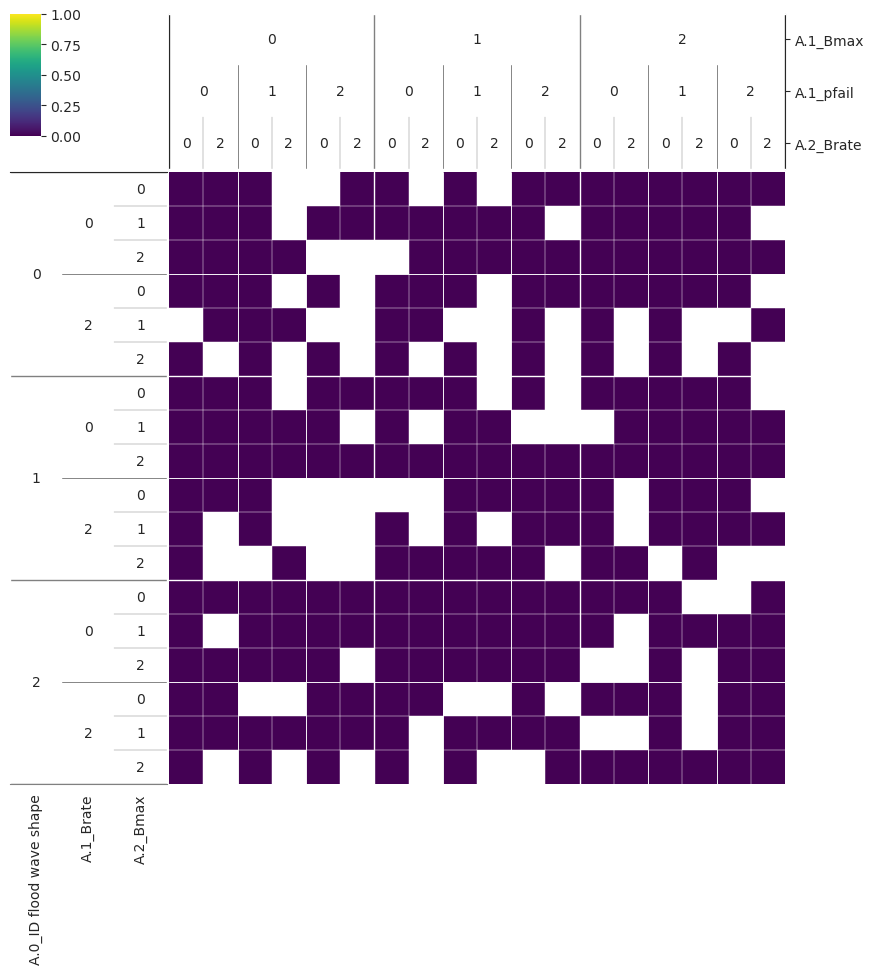

In [83]:
plot_dimensional_stacking(df_experiments_policy, df_outcomes_policy, uncertainties, metrics[7], percentile=25)